# Теория информационных процессов и систем
# Лабораторная работа 1

## 1. Графически и при помощи функций найти пересечение двух кривых:


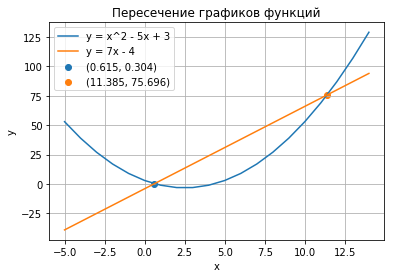

In [73]:
import matplotlib.pyplot as plt
from sympy import *

def Y1(x):
    return x**2 - 5*x + 3 

def Y2(x):
    return 7*x - 4


x = Symbol('x')
x1, x2 = solve(Eq(x**2-5*x+3, 7*x-4), x)
x1 = float(x1)
x2 = float(x2)

X = list(range(-5, 15))
f = [Y1(x) for x in X]
g = [Y2(x) for x in X]

plt.title('Пересечение графиков функций')
plt.plot(X, f)
plt.plot(X, g)
plt.scatter(x1, Y1(x1))
plt.scatter(x2, Y1(x2))
y1, y2 = round(Y1(x1), 3), round(Y1(x2), 3)
x1, x2 = round(x1, 3), round(x2, 3)
plt.legend(['y = x^2 - 5x + 3', 
            'y = 7x - 4',
            str((x1,y1)),
            str((x2, y2))
           ])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Найти точку экстремума функции


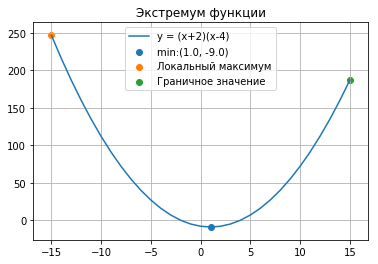

In [32]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def f3(x):
    return (x+2)*(x-4)


x0 = round(minimize(f3, 0).x[0], 2)
y0 = f3(x0)
X = list(range(-15, 16))
Y = [f3(x) for x in X]

plt.plot(X, Y)
plt.scatter(x0, f3(x0))
plt.scatter(-15, f3(-15))
plt.scatter(15, f3(15))
plt.legend(['y = (x+2)(x-4)', 
            'min:'+str((x0, y0)),
            'Локальный максимум',
            'Граничное значение'])

plt.title('Экстремум функции')
plt.grid()

## 3. Дан треугольник ABC. Найти координаты основания перпендикуляра, опущенного из точки B на сторону AC.

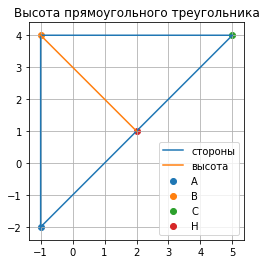

In [90]:
import matplotlib.pyplot as plt
from sympy import *


def AC(x):
    return Ay + k*(x - Ax)

def BH(x):
    return By - (1 / k*(x - Bx))

Ax, Ay = -1, -2
Bx, By= -1, 4
Cx, Cy = 5, 4 
x3 = [Ax, Bx, Cx, Ax]
y3 = [Ay, By, Cy, Ay]

# коэффициент наклона AC
k = (Cy-Ay)/(Cx-Ax)

AC_y = [AC(x) for x in range(-1, 6)]

# координаты высоты BH
x = Symbol('x')
Hx = solve(Eq(Ay + k*(x - Ax), By - (1 / k*(x - Bx))), x)
Hx = int((Hx[0]))

BH_x = list(range(-1, Hx+1))

BH_y = [BH(x) for x in BH_x]



plt.title('Высота прямоугольного треугольника')
plt.plot(x3, y3)
plt.plot(BH_x, BH_y)
plt.scatter(Ax, Ay)
plt.scatter(Bx, By)
plt.scatter(Cx, Cy)
plt.scatter(Hx, BH(Hx))

plt.legend(['стороны', 
            'высота',
           'A', 'B', 'C','H'
           ])
plt.grid()
plt.gca().set_aspect("equal")

## 4. Найти основание перпендикуляра, опущенного из точки A (3; 10) на касательную к окружности радиуса 4, с центром в начале координат

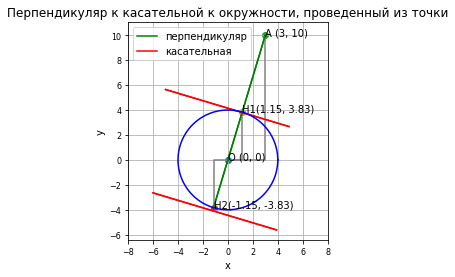

In [162]:
import numpy as np 
from math import sqrt

theta = np.linspace(0, 2 * np.pi, 100)
r = 4
x = r * np.cos(theta)
y = r * np.sin(theta)

x1, y1 = 0, 0  # центр окружности
x2, y2 = 3, 0  # проекция точки A на ось x
x3, y3 = 3, 10  # точка A

# координаты основания перпендикуляра
r12 = sqrt(((x1-x2)**2)+((y1-y2)**2))
r23 = sqrt(((x2-x3)**2)+((y2-y3)**2))
r13 = sqrt(r12**2+r23**2)
r14 = 4

x4 = r14 * r12/r13;
y4 = r14 * r23/r13;
x5 = r14 * (-r12)/r13;
y5 = r14 * (-r23)/r13;

x13 = [x1, x3]
y13 = [y1, y3]

x321 = [x3, x2, x1]
y321 = [y3, y2, y1]

x441 = [x4, x4, x1]
y411 = [y4, y1, y1]

x551 = [x5, x5, x1]
y511 = [y5, y1, y1]

x51 = [x5, x1]
y51 = [y5, y1]

# касательные
x_p = list(np.arange(-5, 5, 0.1))
y_p = [3.8-0.3*(x-1.15) for x in x_p] 

x_p1 = list(np.arange(-6, 4, 0.1))
y_p1 = [-3.8 - 0.3 * (x + 1.15) for x in x_p]
# plot(x_p,y_p)

plt.title('Перпендикуляр к касательной к окружности, проведенный из точки')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x51, y51, 'g') # перепендикуляр
plt.plot(x_p,  y_p, 'r') # касательные
plt.plot(x13, y13, 'g') # перепендикуляр
plt.plot(x_p1, y_p1, 'r') # касательные

plt.scatter(x1, y1)
plt.text(x1, y1, 'O (0, 0)')
plt.scatter(x4, y4)
plt.text(x4, y4, 'H1'+str((round(x4,2), round(y4, 2))))
plt.scatter(x3, y3)
plt.text(x3, y3, 'A (3, 10)')
plt.scatter(x5, y5)
plt.text(x5, y5, 'H2'+str((round(x5,2), round(y5, 2))))
# доп построения
plt.plot(x321, y321, 'grey')
plt.plot(x441, y411, 'grey')
plt.plot(x551, y511, 'grey')

# перепендикуляр
plt.plot(x51, y51, 'g')
plt.plot(x13, y13, 'g')

# касательные
plt.plot(x_p,  y_p, 'r')
plt.plot(x_p1, y_p1, 'r')

# окружность
plt.plot(x, y, 'b')


plt.legend(['перпендикуляр', 
            'касательная',
           ])

plt.axis(xmin=-8, xmax=8)
plt.grid()
plt.gca().set_aspect("equal")


## 5. На графике функции y = (5-x)(5+x) определить точkи, касательная в которых имеет угол наклона.

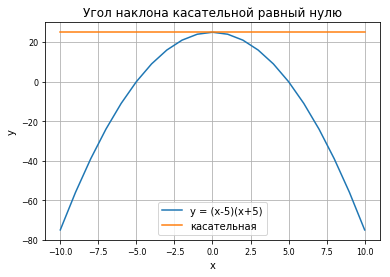

In [174]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def f5(x):
    return (5-x)*(5+x)


X = list(range(-10, 11))
y = [f5(x) for x in X]

y0 = round(minimize(f5, 0).fun[0], 2)


plt.title('Угол наклона касательной равный нулю')
plt.plot(X, y)
plt.plot([-10, 10], [y0]*2)
plt.legend(['y = (x-5)(x+5)', 
            'касательная',
           ])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()